In [70]:
# cài đặt: pip install squarify
# vẽ: squarify.plot

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify 

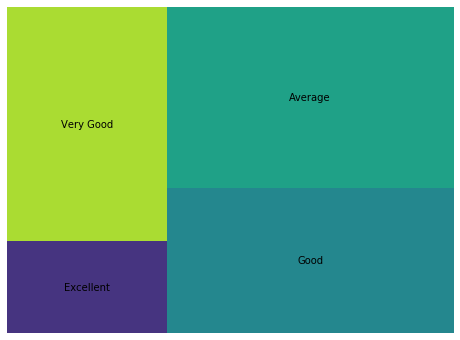

In [72]:
# with 2 lists
size_lst = [7,18,20,25]
label_lst = ['Excellent', 'Very Good', 'Good', 'Average']

plt.figure(figsize=(8,6))
squarify.plot(sizes=size_lst, label=label_lst)
plt.axis('off')
plt.show()

In [73]:
df = pd.DataFrame({
    'student_type': ['Excellent', 'Very Good', 'Good', 'Average'],
    'number_per_type': [7, 18, 20, 25]
})
df

,student_type,number_per_type
0,Excellent,7
1,Very Good,18
2,Good,20
3,Average,25


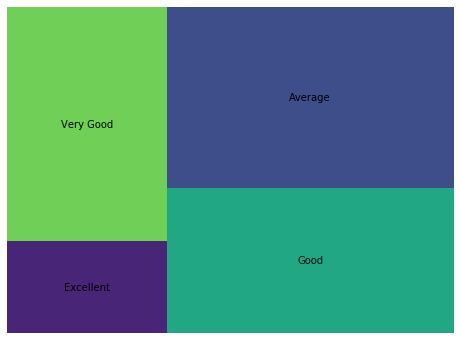

In [74]:
# with dataframe
plt.figure(figsize=(8,6))
squarify.plot(sizes=df['number_per_type'], label=df['student_type'])
plt.axis('off')
plt.show()

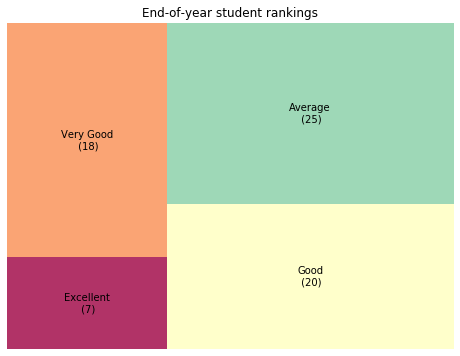

In [75]:
# create data
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))] # phát sinh màu ngẫu nhiên RGB

# Draw Plot
plt.figure(figsize=(8,6))
squarify.plot(sizes=df['number_per_type'], label=labels, color=colors, alpha=.8)

# Decorate
plt.title('End-of-year student rankings')
plt.axis('off')
plt.show()

In [76]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [77]:
df_raw.shape

(234, 11)

In [78]:
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [79]:
df = df_raw.groupby('class').size().reset_index(name='counts')
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


In [80]:
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
print(labels)
print(sizes)
print(colors)

0        2seater\n (5)
1       compact\n (47)
2       midsize\n (41)
3       minivan\n (11)
4        pickup\n (33)
5    subcompact\n (35)
6           suv\n (62)
dtype: object
0     5
1    47
2    41
3    11
4    33
5    35
6    62
Name: counts, dtype: int64
[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), (0.8853517877739331, 0.3190311418685121, 0.29042675893886966, 1.0), (0.9873125720876587, 0.6473663975394078, 0.3642445213379469, 1.0), (0.9971549404075356, 0.9118031526336025, 0.6010765090349866, 1.0), (0.9288735101883892, 0.9715494040753557, 0.6380622837370243, 1.0), (0.6334486735870821, 0.8521337946943485, 0.6436755094194541, 1.0), (0.2800461361014994, 0.6269896193771626, 0.7024221453287197, 1.0)]


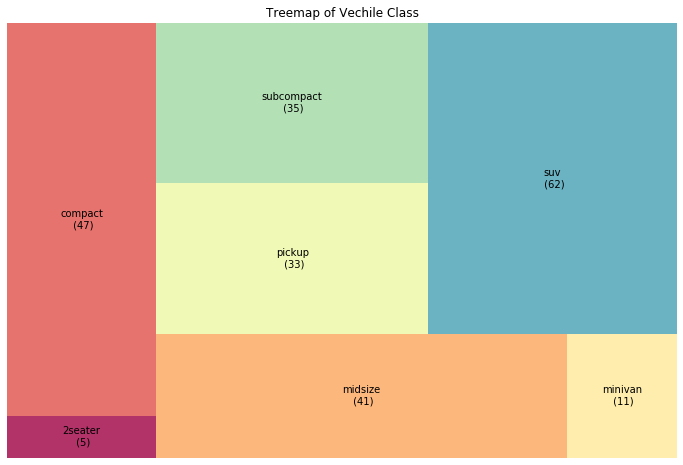

In [81]:
# Draw Plot
plt.figure(figsize=(12,8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

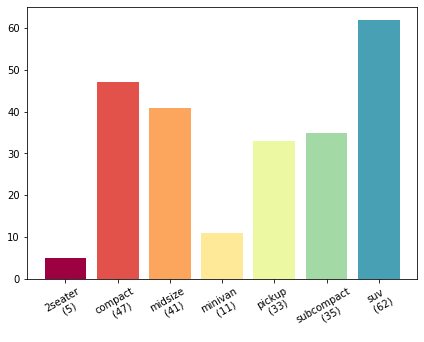

In [82]:
# nói thêm
# vẽ bar plot
x = labels
y = sizes
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(7,5))
plt.bar(x, y, color=colors)
plt.xticks(rotation=30)
plt.show()

In [83]:
wine = pd.read_csv('data/winemag-data_first150k.csv', index_col=0)

In [84]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [85]:
cnt = wine.groupby(['country',])['price'].mean().sort_values(ascending=False).to_frame() # đơn giá trung bình theo mỗi nước
cnt.head()

,price
country,
US-France,50.000000
England,47.500000
France,45.619885
Hungary,44.204348
Luxembourg,40.666667


In [86]:
# nói thêm:
wine.groupby(['country',])['price'].mean().head() # series

country
Albania                   20.000000
Argentina                 20.794881
Australia                 31.258480
Austria                   31.192106
Bosnia and Herzegovina    12.750000
Name: price, dtype: float64

In [87]:
wine.groupby(['country',])['price'].mean().reset_index().head() # dataframe

,country,price
0,Albania,20.000000
1,Argentina,20.794881
2,Australia,31.258480
3,Austria,31.192106
4,Bosnia and Herzegovina,12.750000


In [88]:
wine.groupby(['country',])['price'].mean().to_frame().head() # dataframe

,price
country,
Albania,20.000000
Argentina,20.794881
Australia,31.258480
Austria,31.192106
Bosnia and Herzegovina,12.750000


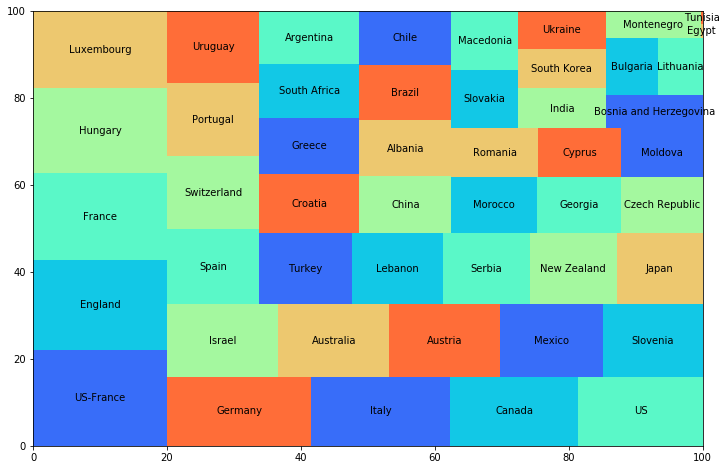

In [89]:
plt.figure(figsize=(12,8))
squarify.plot(cnt['price'].fillna(0.1),color=sns.color_palette('rainbow'),label=cnt.index)
plt.show() # US-France: rượu sản xuất ở Pháp và được bán ở Mỹ --> có đơn giá trung bình cao nhất